# Assignment #1: Grosjean et al. experiment
Sara Iglesias Suárez - Noguerol 

This model simulates the reaction time of simulated subjects to a stimulus that appears after a fixed time for each trial. 
The subject uses the information from previous trials to predict when the next stimulus will appear.

A running average is kept to predict the time at which the stimulus will appear, adding the perceived time from the previous intervals, as pulses (internal time), and after each new trial, the average of the pulse is translated to real time, at which the stimulus is expected.

The difference between the actual time interval and the predicted time is used to calculate the reaction time, which can be at most 410 ms.
- If the subject predicts the stimulus will appear after the time interval, then they are not prepared and the reaction time will be the maximum (410 ms).
- If the subject predicts the stimulus will appear 50 ms before the time interval finishes, then they are completely prepared and it will save all 50 ms in their reaction time (360 ms.)
- If the subject predicts the stimulus will appear between 50 ms before the time interval and the end of the time interval, then the difference between the actual time and the expected time is subtracted from the maximum reaction time since that is how much extra time they get to prepare.

Three experiments are designed, in which the subjects are trained for 15 trials on time intervals of 350 ms, 467 ms, and 700 ms, respectively. In all the experiments, one last (testing) trial is added with a time interval of 467 ms.   

The experiment is run with 100 simulated subjects and averaged out for each trial.


This model is a good qualitative fit to the Grosjean et al. experiment, however the values are aproximately 20 ms higher in all platau areas. Moreover, for the last trial in the "shortened" experiment, the reaction time decreases more than the in the results obtained by Grosjean et al..

In [1]:
from time_funcs import time_to_pulses, pulses_to_time, peak, bisection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reac_time(time_intervals): #time intrvals is obviously a list 
    reps=len(time_intervals)
    results = pd.DataFrame(columns = ['rep', 'time_interval', 'exp_time', 'prepared', 'reac_time'])
    # rep: experiment trial number
    # time_interval: time interval in between stimulus in the experiment
    # exp_time: time at which a stimulus is expected 
    # prepared: Boolean, exp_time < time_interval
    # reac_time: time at which the subject actually reacts to the stimulus (after the stimulus)

    ## Inicialising the first perceived time interval (in pulses)
    pulses = time_to_pulses(time_intervals[0])
    pulses_average = pulses
    ## We do not have any information to make this prediction yet
    exp_time = 0 
    prep = False
    # The reaction time for the first trial is set to the maximun
    max_RT = 0.41
    reac_time = max_RT
    results.loc[len(results)] = [0, time_intervals[0], exp_time, prep, reac_time]

    for int in range(1, reps):
        # the average of the pulses perceived in previous trials is converted to the time the stimulus is expected.
        exp_time = pulses_to_time(np.round(pulses_average)) 

        ## The reaction time is calculated
        if exp_time > time_intervals[int]:
                prep = False
                reac_time = max_RT
        elif (time_intervals[int] - exp_time) > 0.05: #in s (50ms)
                prep = True
                reac_time = max_RT -  0.05
        else:
                diff = (time_intervals[int] - exp_time)
                prep = True
                reac_time = max_RT - diff

        results.loc[len(results)] = [int, time_intervals[int], exp_time, prep, reac_time]
        # The perceived interval (in pulses) from the current trial is added to the running averge
        pulses = pulses + time_to_pulses(time_intervals[int])
        pulses_average = pulses / (int+1)
    return results['reac_time']

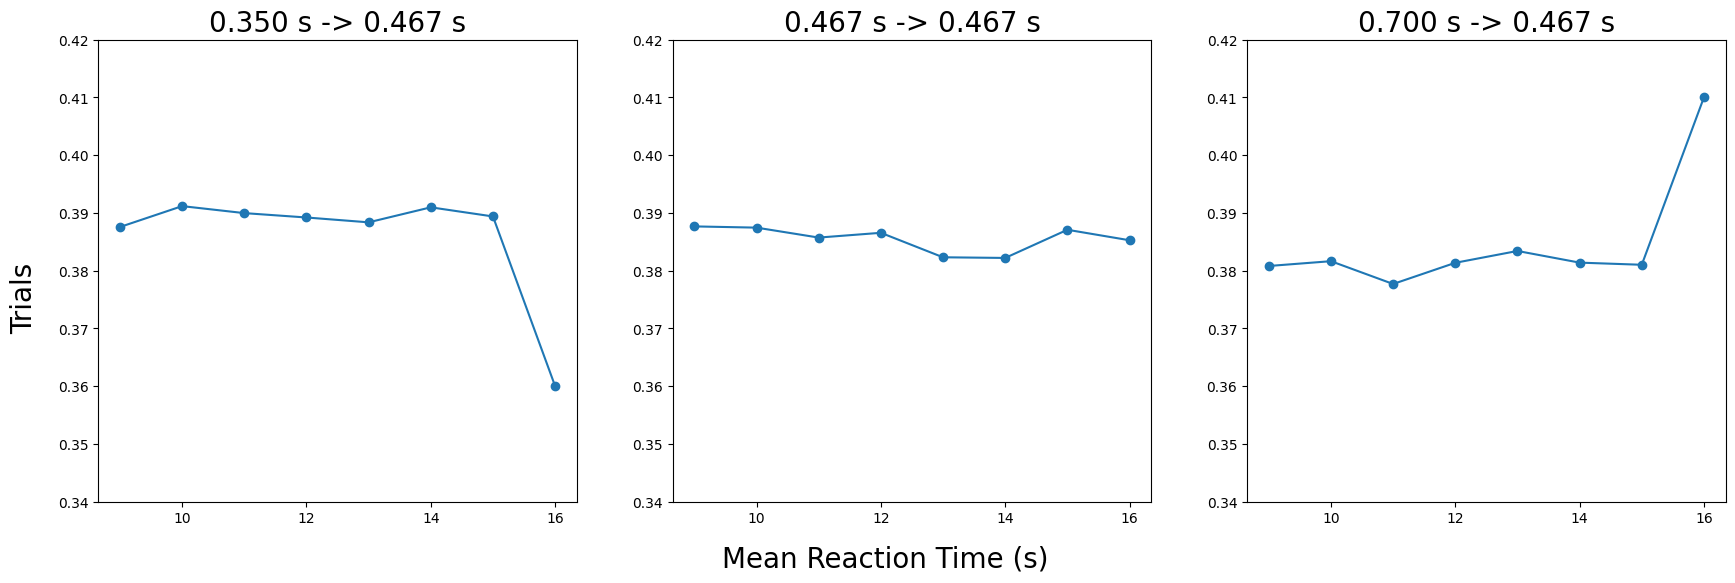

In [3]:
## Create the time intervals for the three different experiments
times_short = [0.7 for i in range(15)]; times_short.append(0.467)  # last trial is shortened
times_control = [0.467 for i in range(15)]; times_control.append(0.467)  # last trial is constant
times_long = [0.35 for i in range(15)]; times_long.append(0.467)  # last trial is lenghtened

subjects = 100    #number of simulated subjects

## Inicialising the data frames
reac_time_short = pd.DataFrame()
reac_time_control = pd.DataFrame()
reac_time_long = pd.DataFrame()

for i in range(subjects): 
    reac_time_short['subjects_'+ str(i)] = reac_time(times_short)
    reac_time_control['subjects_'+ str(i)] = reac_time(times_control)
    reac_time_long['subjects_'+ str(i)] = reac_time(times_long)

## Mean of all subjects for each trial 
reac_time_short_mean = reac_time_short.mean(axis=1)
reac_time_control_mean = reac_time_control.mean(axis=1)
reac_time_long_mean = reac_time_long.mean(axis=1)

trials = np.arange(1, len(reac_time_short_mean)+1)
n = 8 # number of plotted trials
trials = trials[-n:]

fig, axs = plt.subplots(1, 3, sharex = True, sharey = False, figsize=(21, 6))
plt.rcParams['font.size'] = 15
reacs = [reac_time_long_mean.tail(n), reac_time_control_mean.tail(n), reac_time_short_mean.tail(n)]
labels = ['0.350 s -> 0.467 s', '0.467 s -> 0.467 s', '0.700 s -> 0.467 s']
for reacs_index in range(len(reacs)):
    axs[reacs_index].plot(trials, reacs[reacs_index], 'o-')
    axs[reacs_index].set_ylim([0.34, 0.42])
    axs[reacs_index].set_title(labels[reacs_index], fontsize = 20)
#fig.suptitle(' Student marks in different subjects ', fontsize=30)
fig.text(0.5, 0.001, 'Mean Reaction Time (s)', ha = 'center',  fontsize = 20)
fig.text(0.083, 0.45, 'Trials', va = 'center', rotation = 'vertical',  fontsize = 20)
plt.show()
